Import the packages we'll use throughout the course.

In [ ]:
import numpy
import scipy
import pandas
import matplotlib.pyplot as plt
import sklearn

Read the data and check its contents using pandas. The csv file contains information about books from the British Library

In [15]:
df = pandas.read_csv('BL-Flickr-Images-Book.csv')
# df = pandas.excel('BL-Flickr-Images-Book.xlsx')  # if we had an excel file
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


Let's get rid of the columns with too many null/NaN values. First we need to check them using:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

From this output, we see that our dataframe consists of 8287 rows and 15 columns. We can also see the content of each column, getting rid of the useless columns:

In [19]:
columns_to_remove = ['Edition Statement', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver']
df.drop(columns_to_remove, inplace=True, axis=1)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


Now we'll visualize the publication dates of the books using matplotlib library. We see that publication date is of type 'object', which will become problematic since we want to have numbers (int or float).

We can deal with this issue by converting the column to numeric, resulting in non-numeric entries to be NaN, then filtering the rows with NaN values in that column. Remember to call inplace=True, otherwise the function doesn't overwrite the dataframe and just returns the output. It's useful in cases where we need to create 'views' of the dataframe while preserving the original data.

In [21]:
df['Date of Publication'] = pandas.to_numeric(df['Date of Publication'], errors='coerce')
# df.head()
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 1 to 8285
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Identifier            2440 non-null   int64  
 1   Place of Publication  2440 non-null   object 
 2   Date of Publication   2440 non-null   float64
 3   Publisher             2440 non-null   object 
 4   Title                 2440 non-null   object 
 5   Author                2440 non-null   object 
 6   Contributors          2440 non-null   object 
 7   Issuance type         2440 non-null   object 
 8   Flickr URL            2440 non-null   object 
 9   Shelfmarks            2440 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 209.7+ KB


Now we have filtered rows containing any NaN value and are left with a numeric date of publication column. Let's visualize:

Text(0, 0.5, 'Number of books published')

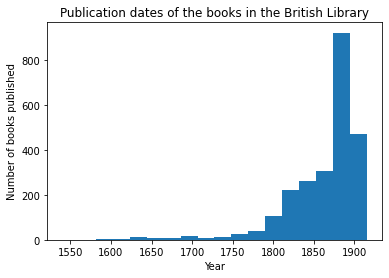

In [6]:
fig, ax = plt.subplots()
ax.hist(df['Date of Publication'], bins=18)
# beautify the plot
ax.set_title('Publication dates of the books in the British Library')
ax.set_xlabel('Year')
ax.set_ylabel('Number of books published')

***
Now let's consider the other dataset, olympics.csv:

In [7]:
df = pandas.read_csv('olympics.csv', header=1)
df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


With header=1, we indicate reader to construct the column names using row 1 (instead of 0).

It contains the number of medals won by countries in the summer and winter olympics. We can clearly see that these column names won't work properly, so let's rename them:

In [8]:
# new names dictionary, in the following format old_name: new_name
new_names =  {'Unnamed: 0': 'Country',
              '? Summer': 'Summer Olympics',
              '01 !': 'Gold',
              '02 !': 'Silver',
              '03 !': 'Bronze',
              '? Winter': 'Winter Olympics',
              '01 !.1': 'Gold.1',
              '02 !.1': 'Silver.1',
              '03 !.1': 'Bronze.1',
              '? Games': '# Games',
              '01 !.2': 'Gold.2',
              '02 !.2': 'Silver.2',
              '03 !.2': 'Bronze.2'}
# renaming function
df.rename(columns=new_names, inplace=True)
# check if it works
df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


With the columns renamed, let's find the outliers among the Bronze winners using z-scores, calculation using scipy:

$$
Z = \frac{x - \mu}\sigma
$$

In [9]:
from scipy import stats
z_scores = stats.zscore(df['Gold'])
z_scores

0      -0.161885
1      -0.149513
2      -0.117349
3      -0.159410
4      -0.154462
         ...    
142    -0.161885
143    -0.161885
144    -0.154462
145    -0.142091
146    11.736627
Name: Gold, Length: 147, dtype: float64

Usually a z-score higher than 3 (or lower than -3) indicates an outlier, so let's find which rows satisfy that condition using numpy.where:

In [10]:
outlier_indices = numpy.where(numpy.logical_or(z_scores > 3, z_scores < -3))
outlier_indices

(array([146], dtype=int64),)

So row 146 is an outlier in terms of z-score, let's check its values:

In [11]:
df.loc[outlier_indices[0], :]

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
146,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579


As the totals row, it makes sense that it's an outlier. In an analysis, we would have to get rid of this row at the beginning, as follows:

In [12]:
outliers_dropped_df = df.drop(outlier_indices[0])
outliers_dropped_df

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8
